# LGBM & XGBM

In [87]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import lightgbm as lgb
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [88]:
#Load Dataset
df = pd.read_csv("diabetes.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [89]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


#### Exploratory Data Analysis (EDA)

In [90]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Info:\n")
df.info()


Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   

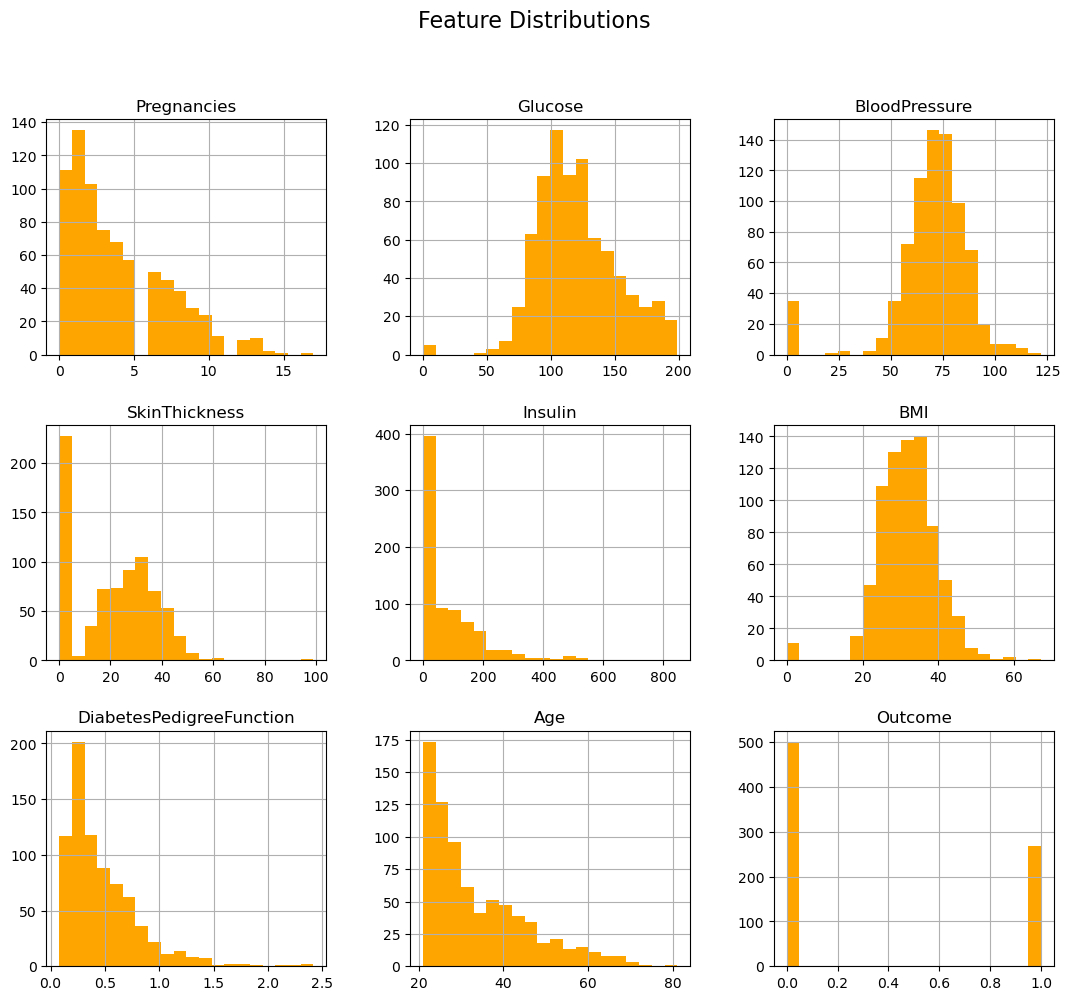

In [91]:
# Distribution of numerical features
df.hist(figsize=(13, 11), bins=20, color='orange')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


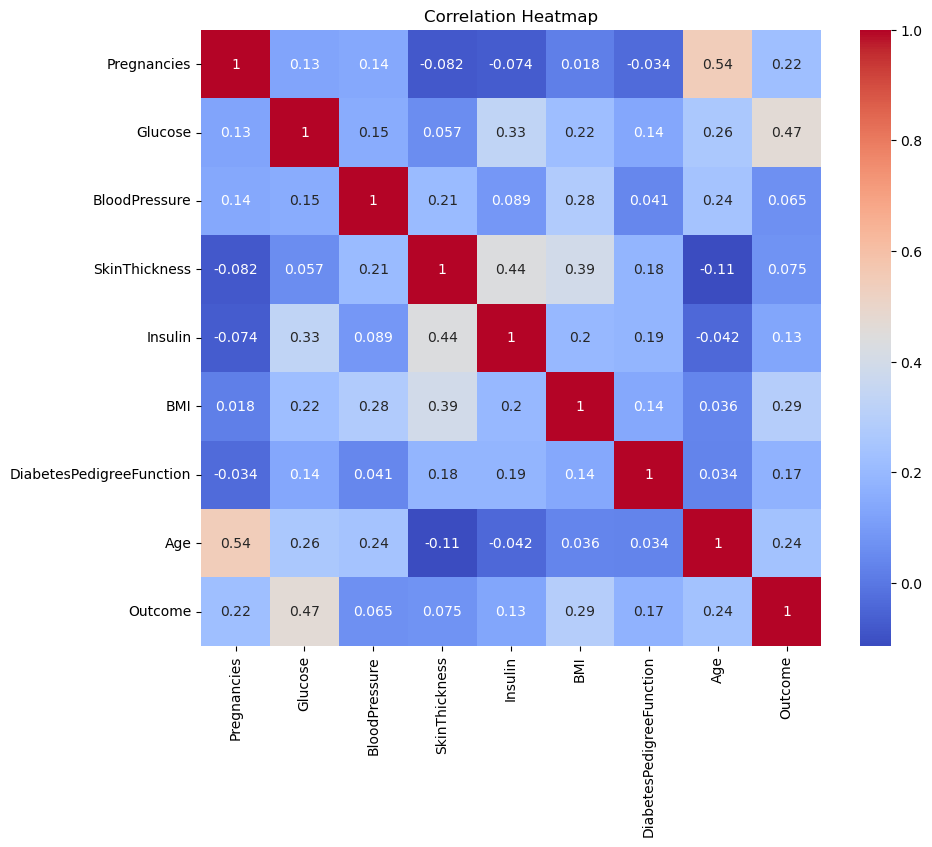

In [92]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


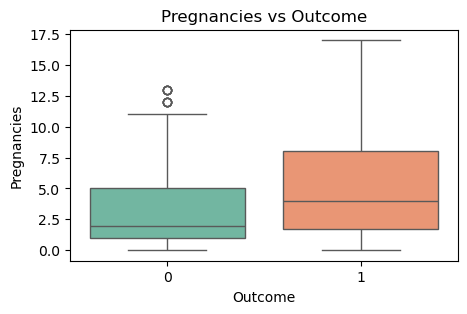

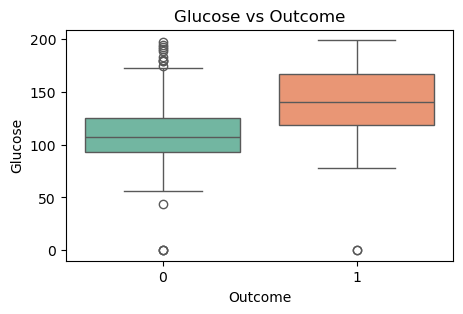

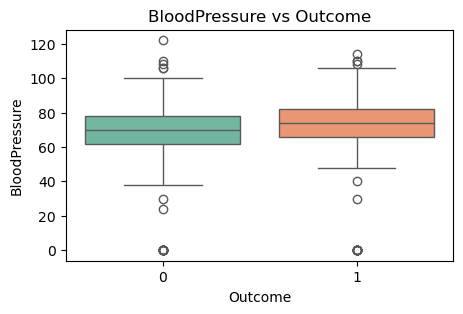

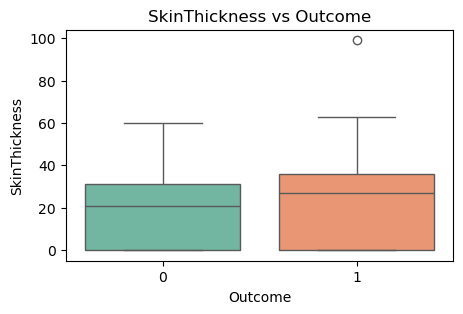

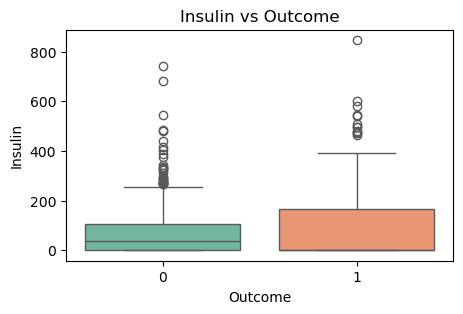

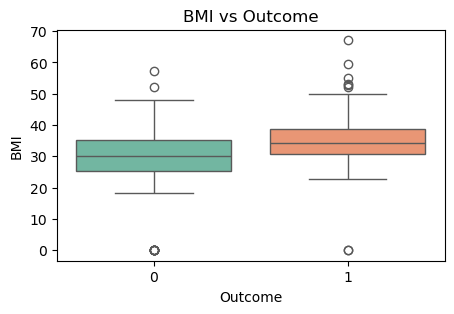

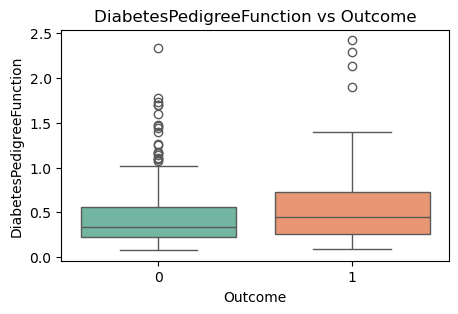

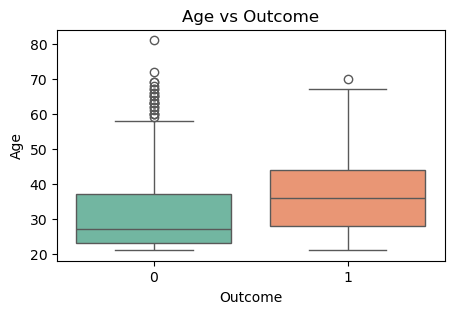

In [93]:
# Relationship between features and outcome
for col in df.columns[:-1]:
    plt.figure(figsize=(5,3))
    sns.boxplot(x='Outcome', y=col, data=df, palette="Set2")
    plt.title(f"{col} vs Outcome")
    plt.show()


#### Visualize Relationships (Scatter & Bar Plots)

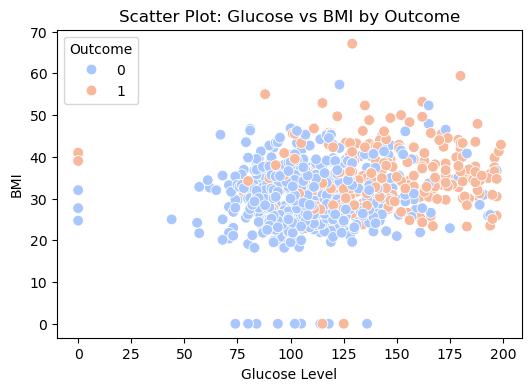

<Figure size 1000x600 with 0 Axes>

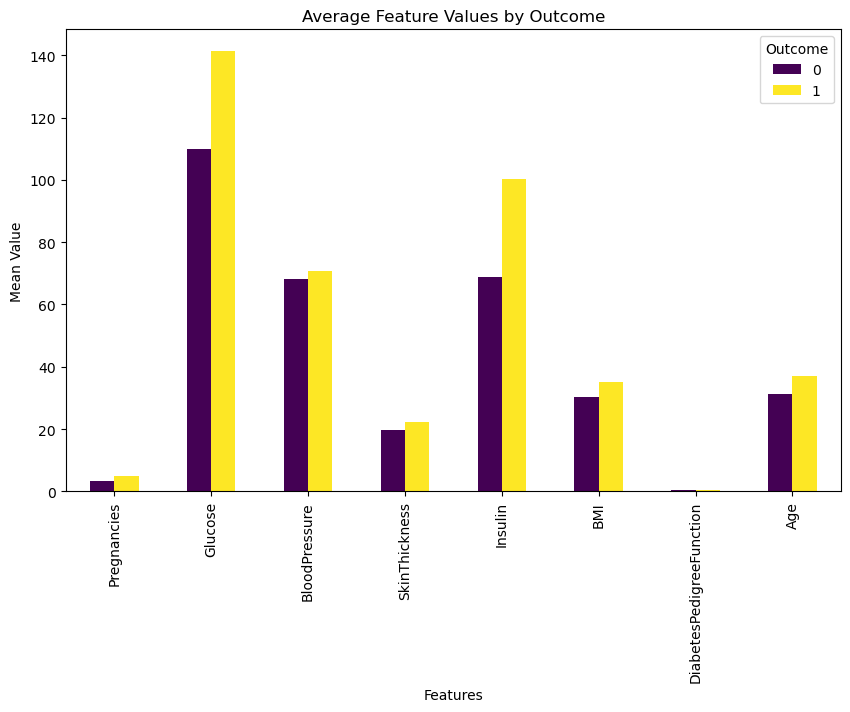

In [94]:
# Scatter Plot: Relationship between two key features, colored by Outcome
plt.figure(figsize=(6,4))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='coolwarm', s=60)
plt.title("Scatter Plot: Glucose vs BMI by Outcome")
plt.xlabel("Glucose Level")
plt.ylabel("BMI")
plt.show()

# Bar Plot: Average feature values grouped by Outcome
mean_values = df.groupby('Outcome').mean().T

plt.figure(figsize=(10,6))
mean_values.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.title("Average Feature Values by Outcome")
plt.ylabel("Mean Value")
plt.xlabel("Features")
plt.legend(title='Outcome')
plt.show()


# Data Preprocessing

In [96]:
# Impute Missing Values
df.isnull().sum()
df.fillna(df.mean(), inplace=True)

In [97]:
# Encode Categorical Variables (if any)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

print("Missing values handled and categorical variables encoded successfully.")

Missing values handled and categorical variables encoded successfully.


In [98]:
# Check how each feature correlates with the target variable
corr = df.corr()['Outcome'].sort_values(ascending=False)
print("🔹 Feature correlations with Outcome:\n", corr)

🔹 Feature correlations with Outcome:
 Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


# Building Predective models

In [99]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (614, 8)
Testing Data Shape: (154, 8)


In [100]:
#Build Predictive Models using LightGBM and XGBoostimport lightgbm as lgb
import xgboost as xgb

# LightGBM Model
lgb_model = lgb.LGBMClassifier(
    random_state=42,       # ensures reproducibility
    verbose=-1             # suppresses unnecessary warnings
)

# Train LightGBM model
lgb_model.fit(X_train, y_train)
print("LightGBM model trained successfully.")


# XGBoost Model
xgb_model = xgb.XGBClassifier(
    random_state=42,       # ensures reproducibility
    eval_metric='logloss', # evaluation metric to avoid warnings
    verbosity=0            # suppresses console messages
)

# Train XGBoost model
xgb_model.fit(X_train, y_train)
print("XGBoost model trained successfully.")


LightGBM model trained successfully.
XGBoost model trained successfully.


In [107]:
#Model Building - LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print("   LightGBM Evaluation   ")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall:", recall_score(y_test, y_pred_lgb))
print("F1 Score:", f1_score(y_test, y_pred_lgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))

   LightGBM Evaluation   
Accuracy: 0.7467532467532467
Precision: 0.6530612244897959
Recall: 0.5925925925925926
F1 Score: 0.6213592233009708

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



In [109]:
# Model Building - XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss', verbosity=0)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\n XGBoost Evaluation ")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


 XGBoost Evaluation 
Accuracy: 0.7337662337662337
Precision: 0.6226415094339622
Recall: 0.6111111111111112
F1 Score: 0.616822429906542

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [43]:
## Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# LightGBM parameter grid
param_grid_lgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20]
}

grid_lgb = GridSearchCV(
    estimator=lgb.LGBMClassifier(random_state=42),
    param_grid=param_grid_lgb,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_lgb.fit(X_train, y_train)

print("Best Parameters for LightGBM:", grid_lgb.best_params_)
print("Best Cross-Validation Accuracy:", grid_lgb.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters for LightGBM: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31}
Best Cross-Validation Accuracy: 0.755770763589989


In [110]:
## Hyperparameter Tuning (XGBoost)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_xgb = GridSearchCV(
    estimator=xgb.XGBClassifier(random_state=42, eval_metric='logloss', verbosity=0),
    param_grid=param_grid_xgb,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_xgb.fit(X_train, y_train)

print("Best Parameters for XGBoost:", grid_xgb.best_params_)
print("Best Cross-Validation Accuracy:", grid_xgb.best_score_)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters for XGBoost: {'colsample_bytree': 1, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}
Best Cross-Validation Accuracy: 0.767168818747011


## Comparative Visualization

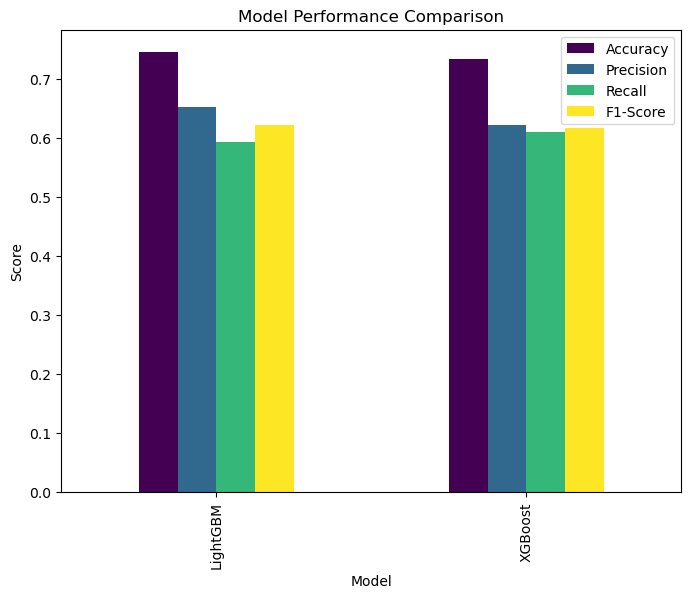

Model performance comparision table:

          Accuracy  Precision    Recall  F1-Score
Model                                            
LightGBM  0.746753   0.653061  0.592593  0.621359
XGBoost   0.733766   0.622642  0.611111  0.616822


In [114]:
results = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_lgb), accuracy_score(y_test, y_pred_xgb)],
    'Precision': [precision_score(y_test, y_pred_lgb), precision_score(y_test, y_pred_xgb)],
    'Recall': [recall_score(y_test, y_pred_lgb), recall_score(y_test, y_pred_xgb)],
    'F1-Score': [f1_score(y_test, y_pred_lgb), f1_score(y_test, y_pred_xgb)]
})

results.set_index('Model', inplace=True)
results.plot(kind='bar', figsize=(8,6), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

print("Model performance comparision table:\n")
print(results)


In [115]:
# Cross Validation
cv_lgb = cross_val_score(lgb_model, X, y, cv=5, scoring='accuracy').mean()
cv_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy').mean()
print("\nCross Validation Accuracy:")
print(f"LightGBM: {cv_lgb:.4f}")
print(f"XGBoost: {cv_xgb:.4f}")


Cross Validation Accuracy:
LightGBM: 0.7474
XGBoost: 0.7410


In [116]:
# Conclusion
print("\n📊 Conclusion:")
if results.loc['LightGBM', 'Accuracy'] > results.loc['XGBoost', 'Accuracy']:
    print("LightGBM performed slightly better on this dataset.")
else:
    print("XGBoost performed slightly better on this dataset.")
print("Both algorithms achieved competitive performance with minor differences.")


📊 Conclusion:
LightGBM performed slightly better on this dataset.
Both algorithms achieved competitive performance with minor differences.
